In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('spam.csv',  encoding='latin')

In [3]:
df = dataset.copy()

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1. Data Cleaning------

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# we will drop last three colomns

In [8]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Renaming columns

In [11]:
df = df.rename(columns={'v1': 'target', 'v2': 'text'})

In [12]:
# we will convert the target column into numerical column by label encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [13]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# duplicate values

df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## 2. EDA-----

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
target_value_count = df['target'].value_counts()

In [22]:
target_value_count

0    4516
1     653
Name: target, dtype: int64

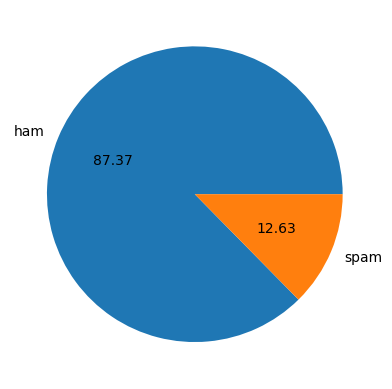

In [23]:
plt.pie(target_value_count, labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [24]:
## Data is imbalance

In [25]:
# 3 new columns will be there - characters, words, sentances of the sms.
# For this we wil be using -> nltk(natural language tool kit[NLP toolkit])

!pip install nltk

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\intel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# number of words

df['num_words'] =df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# number of sentance

df['num_sentances'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

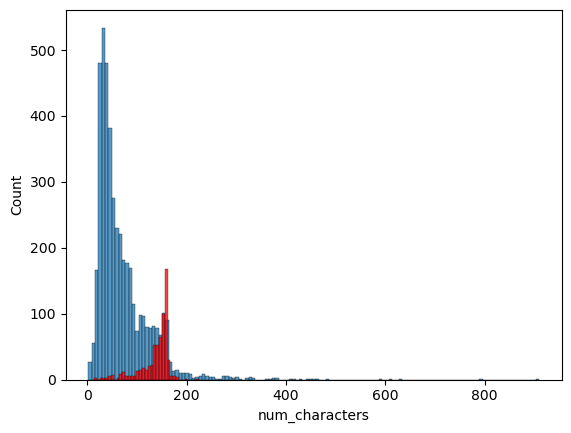

In [32]:
# Plotting histograms

# For ham messages
sns.histplot(df[df['target'] == 0]['num_characters'])

# For spam messages
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<AxesSubplot:>

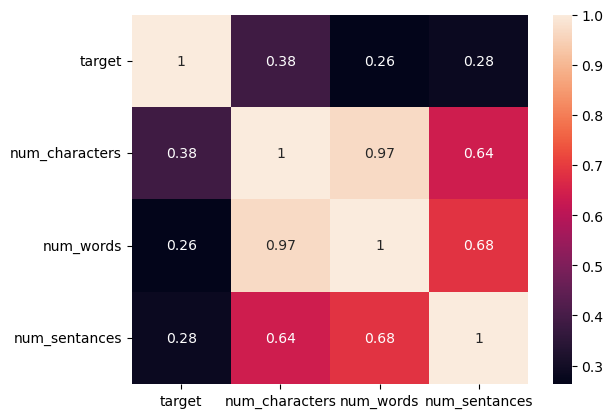

In [33]:
sns.heatmap(df.corr(), annot=True)

In [34]:
# We have high correlation between the num_characters and num_words also in between num_words
# and num_sentance, also in between num_words and num_characters.

# So when we will build the model we will take only one between these three as these three are highly correlated
# We will take num_characters as it is less correlated with target

## 3. Data Preprocessing / Text preprocessing

1. Lower case
2. Tokenization (Breaking into words)
3. Removing special characters
4. Removing stop words and punctation ('is', 'am', 'the' these kind of words removal)
5. Steming (reduce the same meaning words - 'Dance', 'Dancing', both signifies 'Dance' so it will reduce the other words)

In [35]:
# what are stopwords?
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
# what are the punctuation?
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
# what is stemming?
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Eating')

'eat'

In [38]:
# Creating a function which will perform all the data processing steps together

def transform_text(text):
    #----breaking in lower case
    text = text.lower()
    
    #-----Tokeization into words
    text = nltk.word_tokenize(text)
    
    #------removing special characters - by checking if it is an alphanumeric then appending into an array, and returning that
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]                 #----cloning
    y.clear()                   #----emptying y array
    
    
    # ----removing stop words and punctation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    #----- stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [39]:
transform_text('Hi how are %% you AB7?? Are you EATING now?')

'hi ab7 eat'

In [40]:
df['transformed_text'] = df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
# We will make a word cloud which will show the most used words in spam/ham messages

In [43]:
!pip install wordcloud

In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

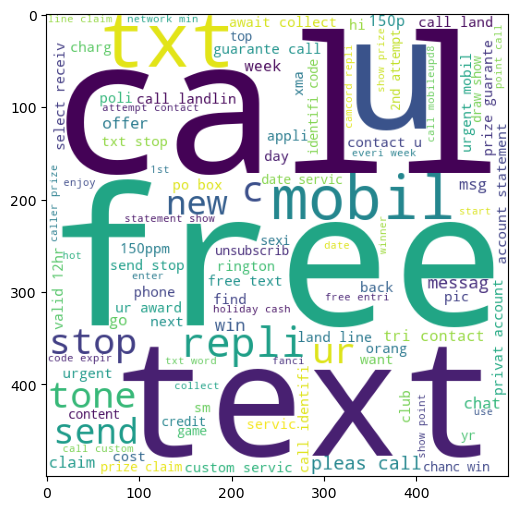

In [45]:
plt.figure(figsize=(50,6))
plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

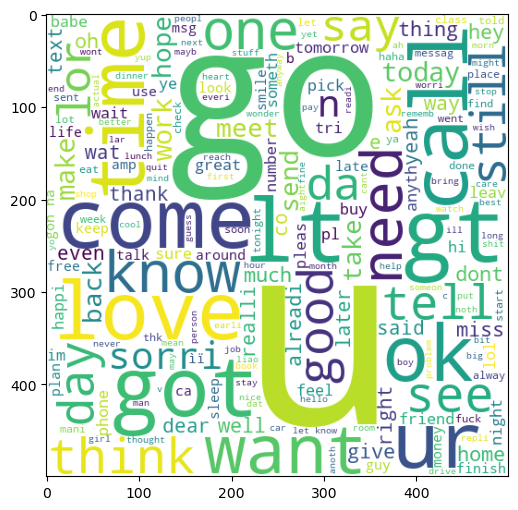

In [47]:
plt.figure(figsize=(50,6))
plt.imshow(spam_wc)

In [48]:
# Now, we will see what are the top 30 words used in spam/ham messages


In [49]:
# extracting the rows which ae having only spam messages

df[df['target'] == 1].head(2)

,target,text,num_characters,num_words,num_sentances,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...


In [50]:
# we will break the transformed_text into words and store it in an array

spam_corpus = []
for brkdmsg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in brkdmsg.split():
        spam_corpus.append(word)
len((spam_corpus))

9939

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


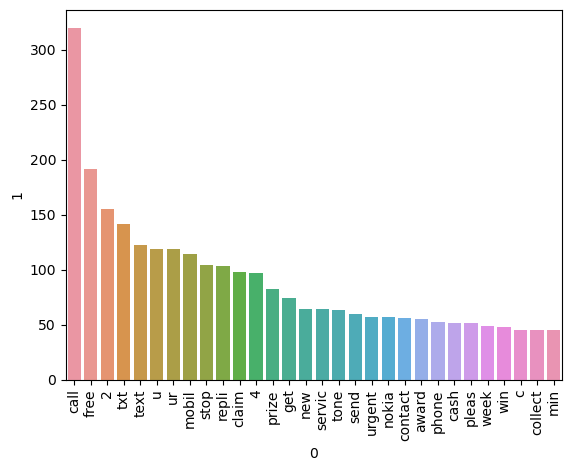

In [51]:
# we will see which is the most occured word using some new library

from collections import Counter
# Counter(spam_corpus)     -----------> this gives which word is used how much times, hige length so commented out this
# Counter(spam_corpus).most_common(30)   ----->  this gives the most common 30 words
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

In [52]:
# ham message most common word

ham_corpus = []
for brkdmsg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in brkdmsg.split():
        ham_corpus.append(word)
len((ham_corpus))

35394

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


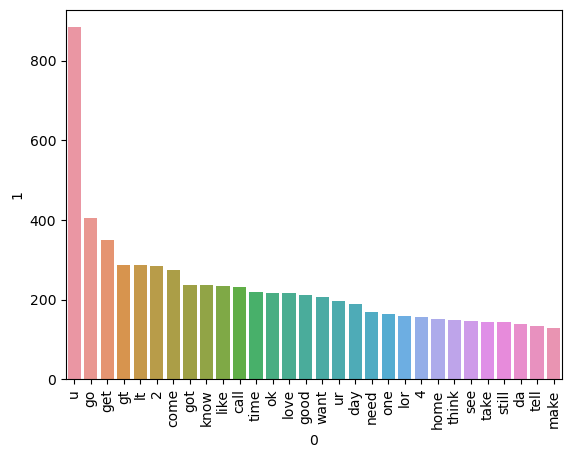

In [53]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

## 4. Model Building

In [54]:
# We will use Naive Bye's first as we all know in the texual data Naive Bye's gives the best result, we will
#  also try with other ML algorithms as well

In [55]:
# Here input is the 'transformed_text' and output is 'target', so the input is a text, but we need number. So,
# We will use "Bag of words" technique -- 'Countvectorizer' to convert the text into numbers this is also called - vectorization
# We will also use another method for conversion of text to numbers, which is -- 'Tfidfvectorizer'
# And will give that as the input of the model

In [110]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)
#To improve the mdoel accuracy we are using the paraeter max_featurs

In [91]:
#Independent feature
X = cv.fit_transform(df['transformed_text']).toarray()
X1 = tf.fit_transform(df['transformed_text']).toarray()

In [92]:
X.shape

(5169, 6708)

In [93]:
X1.shape

(5169, 3000)

In [94]:
#Dependent feature
y = df['target'].values

In [95]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [96]:
#Train-Test splitting
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=2)

In [97]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [98]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("==============  BY GaussianNB  ================")
print("accuracy_score --->", accuracy_score(y_test, y_pred1))
print("confusion_matrix --->",confusion_matrix(y_test, y_pred1))
print("precision_score --->", precision_score(y_test, y_pred1))

==============  BY GaussianNB  ================
accuracy_score ---> 0.8694390715667312
confusion_matrix ---> [[788 108]
 [ 27 111]]
precision_score ---> 0.5068493150684932


In [99]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("==============  BY MultinomialNB  ================")
print("accuracy_score --->", accuracy_score(y_test, y_pred2))
print("confusion_matrix --->",confusion_matrix(y_test, y_pred2))
print("precision_score --->", precision_score(y_test, y_pred2))

==============  BY MultinomialNB  ================
accuracy_score ---> 0.9709864603481625
confusion_matrix ---> [[896   0]
 [ 30 108]]
precision_score ---> 1.0


In [100]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("==============  BY BernouliNB  ================")
print("accuracy_score --->", accuracy_score(y_test, y_pred3))
print("confusion_matrix --->",confusion_matrix(y_test, y_pred3))
print("precision_score --->", precision_score(y_test, y_pred3))

==============  BY BernouliNB  ================
accuracy_score ---> 0.9835589941972921
confusion_matrix ---> [[895   1]
 [ 16 122]]
precision_score ---> 0.991869918699187


In [101]:
## As data is imbalance and also it is a classification issue so precesion score puts a great imapct
## In this case MultinomialNB is giving best precesion score and accuracy is not bad as well 

## So we will consider "tfidf , MultinomialNB"

In [102]:
# we are adding more algos to test
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [103]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [104]:
clfs = {
    'ExtraTreeClassifer': etc,
    'SVC': svc,
    'KNeighbours': knc,
    'Multinomial': mnb,
    'Decesion Tree': dtc,
    'Logistic': lrc,
    'Random Forest': rfc,
    'Adaboost': abc,
    'Bagging Classifier': bc,
    'Extra Tree Classifier': etc,
    'Gradient Boosting': gbdt,
    'XGBoost': xgb
}

In [105]:
def train_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precesion = precision_score(y_test, y_pred)
    return accuracy, precesion

In [106]:
train_classifier(svc, X_train, X_test, y_train, y_test)

(0.9758220502901354, 0.9747899159663865)

In [107]:
accuracyScores = []
precisionScores = []

for name,clf in clfs.items():
    current_accuracy, current_precesion = train_classifier(clf, X_train, X_test, y_train, y_test)
    print("=" *32)
    print("Calculating the scores for - ", name)
    print("Accuracy score is --->", current_accuracy)
    print("Precesion score is --->", current_precesion)
    
    accuracyScores.append(current_accuracy)
    precisionScores.append(current_precesion)

Calculating the scores for -  ExtraTreeClassifer
Accuracy score is ---> 0.9748549323017408
Precesion score is ---> 0.9745762711864406
Calculating the scores for -  SVC
Accuracy score is ---> 0.9758220502901354
Precesion score is ---> 0.9747899159663865


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Calculating the scores for -  KNeighbours
Accuracy score is ---> 0.9052224371373307
Precesion score is ---> 1.0
Calculating the scores for -  Multinomial
Accuracy score is ---> 0.9709864603481625
Precesion score is ---> 1.0
Calculating the scores for -  Decesion Tree
Accuracy score is ---> 0.9294003868471954
Precesion score is ---> 0.8282828282828283
Calculating the scores for -  Logistic
Accuracy score is ---> 0.9584139264990329
Precesion score is ---> 0.9702970297029703
Calculating the scores for -  Random Forest
Accuracy score is ---> 0.9748549323017408
Precesion score is ---> 0.9827586206896551
Calculating the scores for -  Adaboost
Accuracy score is ---> 0.960348162475822
Precesion score is ---> 0.9292035398230089
Calculating the scores for -  Bagging Classifier
Accuracy score is ---> 0.9574468085106383
Precesion score is ---> 0.8671875
Calculating the scores for -  Extra Tree Classifier
Accuracy score is ---> 0.9748549323017408
Precesion score is ---> 0.9745762711864406
Calculati

In [108]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracyScores, 'Precesion': precisionScores}).sort_values('Precesion', ascending=False)

In [109]:
performance_df

,Algorithm,Accuracy,Precesion
2,KNeighbours,0.905222,1.000000
3,Multinomial,0.970986,1.000000
6,Random Forest,0.974855,0.982759
1,SVC,0.975822,0.974790
0,ExtraTreeClassifer,0.974855,0.974576
9,Extra Tree Classifier,0.974855,0.974576
5,Logistic,0.958414,0.970297
11,XGBoost,0.971954,0.943089
7,Adaboost,0.960348,0.929204
10,Gradient Boosting,0.947776,0.920000


In [111]:
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))